## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [ ]:
X.isnull().any().any() #False - пропусков в данных нет, живем

False

In [ ]:
X.info() #Все данные числовые

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
from sklearn.model_selection import train_test_split
#как показывает у, данные у нас идут строго по классам, поэтому будем их перемешивать
#чтобы у нас равномерное разделились классы по тестовой и тренировочной выборкам, нужно указать stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=66, stratify=y)

In [ ]:
np.bincount(y_train)/sum(np.bincount(y_train)) #распределение классов в train в долях

array([0.33064516, 0.40322581, 0.26612903])

In [ ]:
np.bincount(y_test)/sum(np.bincount(y_test)) #распределение классов в test в долях

array([0.33333333, 0.38888889, 0.27777778])

Изначально датасет у нас идет "слоями": сначала класс 0, потом 1, потом 2. Поэтому при его делениии важно, что он перемешался (это делает `shuffle`). Но также важно, чтобы распределение классов в тестовой и тренировочной выборке у нас было примерно одинаковым, так и получилось благодаря "стратификации по y" или указании параметра `stratify=y` в функции `train_test_split`

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
#выделяем только нужные признаки
X1_train = X_train[['alcohol','magnesium']]
X1_test = X_test[['alcohol','magnesium']]

In [ ]:
#масштабируем признаки по стандартному нормальному распредлению
scaler = StandardScaler()
scaler.fit(X1_train)
X1_train_transformed = scaler.transform(X1_train)
X1_test_transformed = scaler.transform(X1_test)

In [ ]:
#нужные значения числа соседей
df = pd.DataFrame(columns=['NN', 'Train', 'Test'])
df['NN'] = np.array([1,3,5,10,15,25])
df.set_index(['NN'], inplace=True)

In [ ]:
#обучаем классификатор на тренировочных данных, предсказываем значения на тестовых и тренировочных
arr_clf = []
for k in df.index:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X1_train_transformed, y_train)
    arr_clf.append(clf)

    y_predicted_test = clf.predict(X1_test_transformed)
    y_predicted_train = clf.predict(X1_train_transformed)

    df.at[k, 'Test'] = np.mean(y_predicted_test == y_test)
    df.at[k, 'Train'] = np.mean(y_predicted_train == y_train)


In [ ]:
#результаты обучения: NN-значение гиперпараметра, в Train и Test - Accuracy
df

,Train,Test
NN,,
1,1.0,0.666667
3,0.854839,0.62963
5,0.822581,0.555556
10,0.798387,0.555556
15,0.790323,0.592593
25,0.75,0.62963


Мы обучили 6 классификатор для каждого `n` среди `[1,3,5,10,15,25]`. Доля правильных ответ на тренировочной выборке выше, но это потому, что алгоритм уже знает эти данные.

Среди обученных классификаторов лучшим оказался первый по accuracy, но проблема n=1 в том, что классификатор переобучен, далее подробнее об этом.



**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

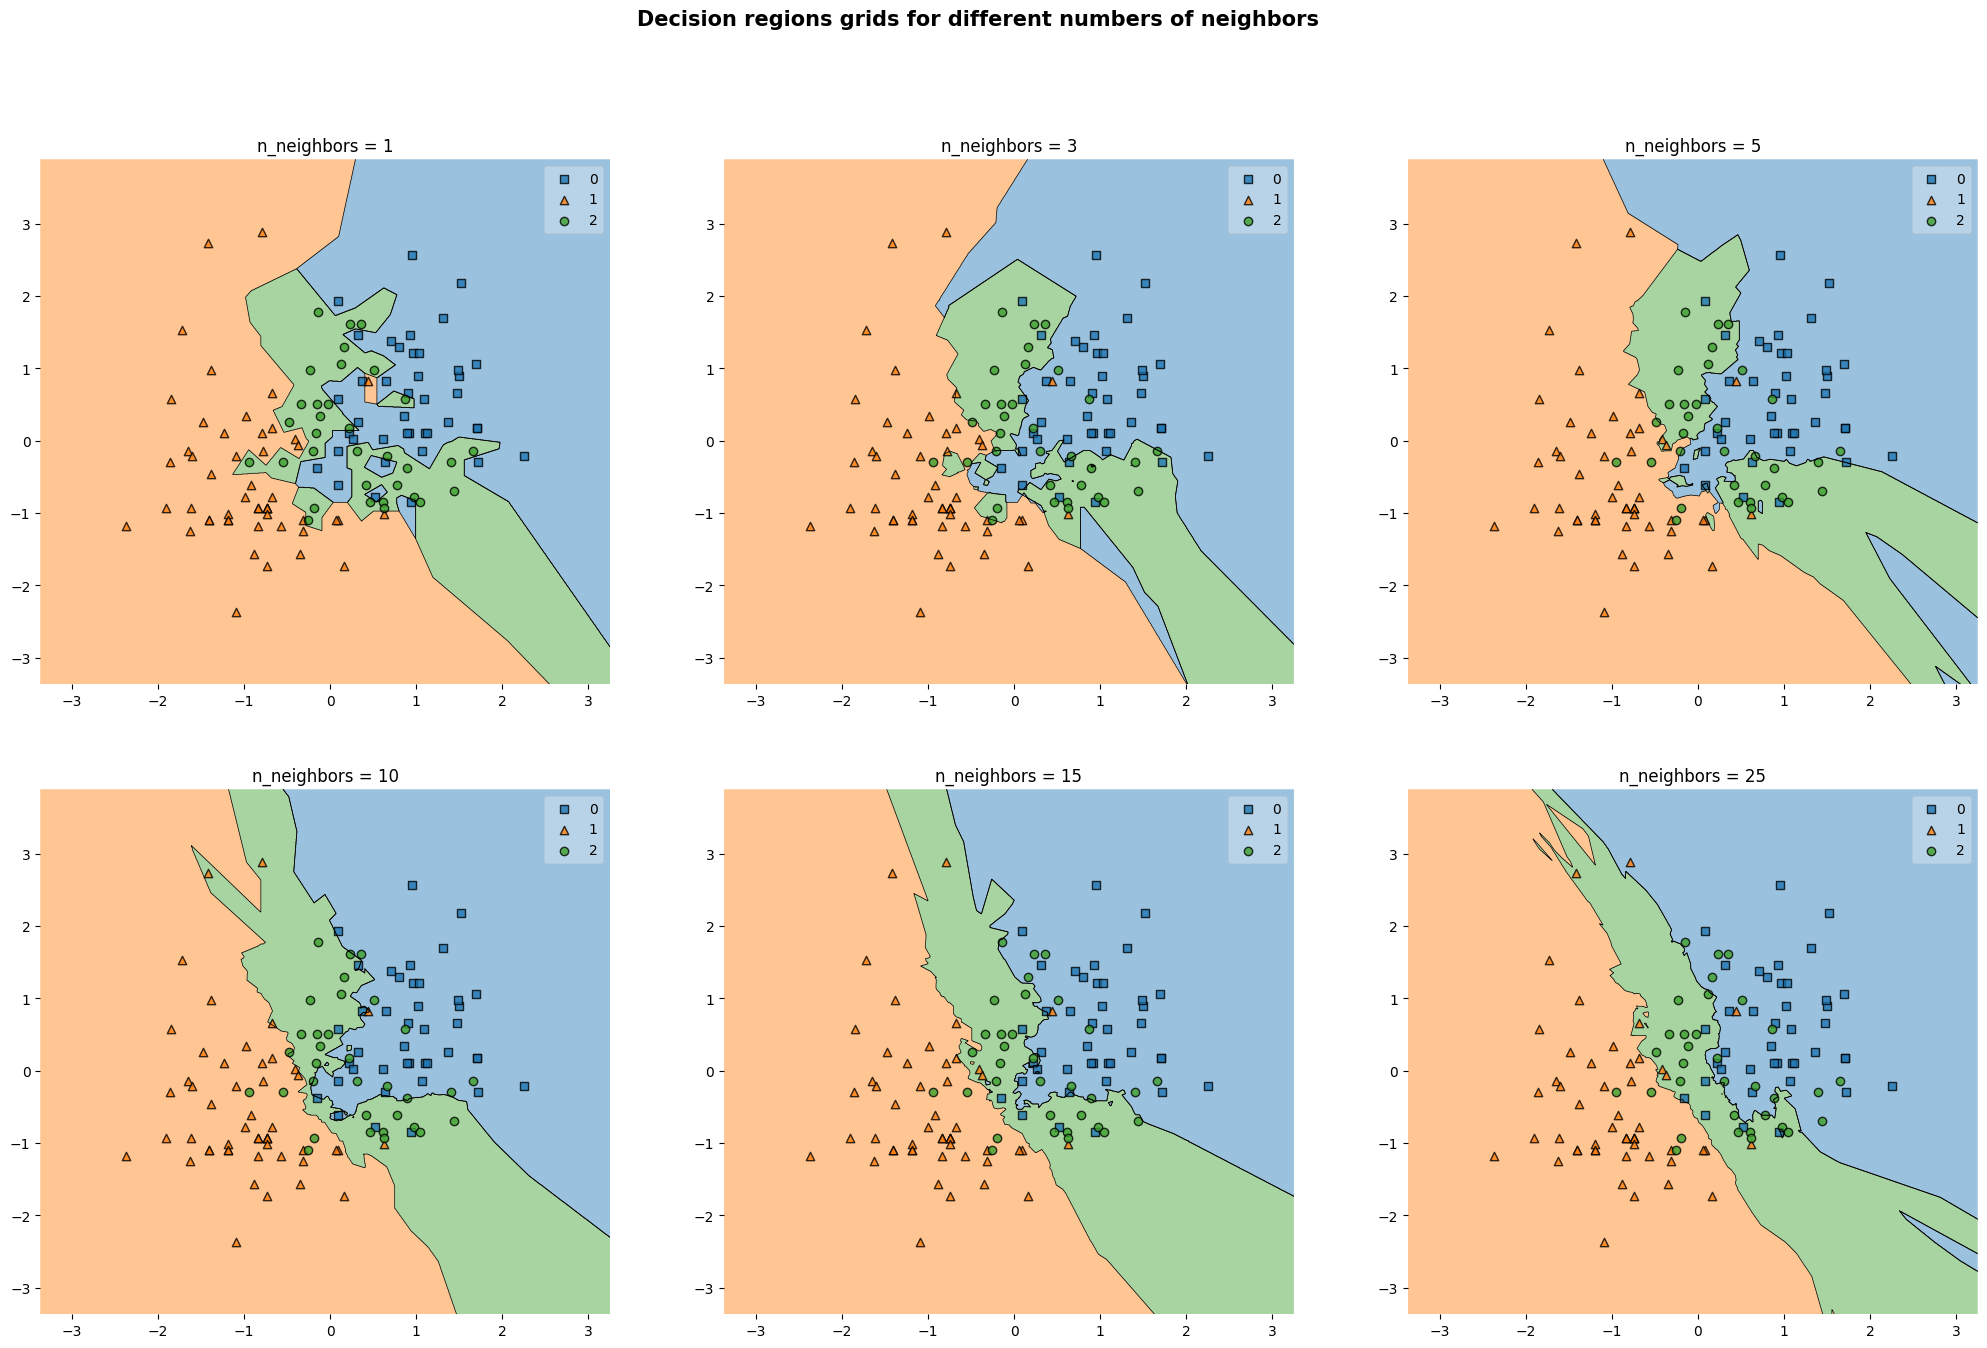

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(25,15))
plt.suptitle(r"Decision regions grids for different numbers of neighbors", fontsize=15, fontweight='bold')

for clf, n, grd in zip(arr_clf,
                         df.index,
                         itertools.product([0, 1], [0, 1, 2])):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X1_train_transformed, y=y_train, clf=clf)
    plt.title('n_neighbors = '+ str(n))

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

Если значение соседей мало, то возникает эффект переобучения, когда решение классификатора принимается на основе малого числа примеров и имеет низкую значимость. Для 1 соседа классификатор просто приписывает метку ближайшего соседа. Поэтому разделяющие поверхности у классификатором с малым числом соседей такие разрезанные.

Но если число соседей будет слишком большим, сравнимым с числом объектов в выборке, то классификатор будет приписывать всем одно и то же значение, что тоже плохо.

При увеличении числа соседей разделяющая поверхность становится все более гладкой и похожей на пересечение прямых. При значении 10 она выглядит наиболее разумной, а дальше синий класс начинает поглощать зеленый.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

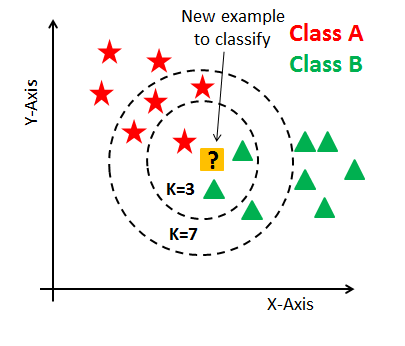

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
      self.k = k

    def fit(self, X, y):
      self.X = X
      self.y = y

    def predict(self, X):
      y_pred = [] #массив предсказанных значений
      for x_pred in X:
        dist = [] #массив расстояний от точки x_pred до точек из self.X
        for x in self.X:
          d = self.count_distance(x,x_pred)
          dist.append(d)
        zipped = list(zip(self.y, dist))
        sorted_zipped = sorted(zipped, key = lambda x: x[1])[:self.k] #выбираем k точек с мин расстояние
        pred_k, dist_k = zip(*sorted_zipped)
        pred = Counter(pred_k).most_common(1)[0][0] #самый частотный класс
        y_pred.append(pred)
      return np.array(y_pred)

    def count_distance(self, x, y):
      return ((x[1]-y[1])**2 + (x[0]-y[0])**2)**0.5 #евклидово расстояние

In [ ]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [2]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [3]:
data.info() #пропущенных значений нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
#0 столбец не имеет смысла, т.к. является индексом, удалим его
col_list=list(data)
col_list.pop(0)
data = data[col_list]
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

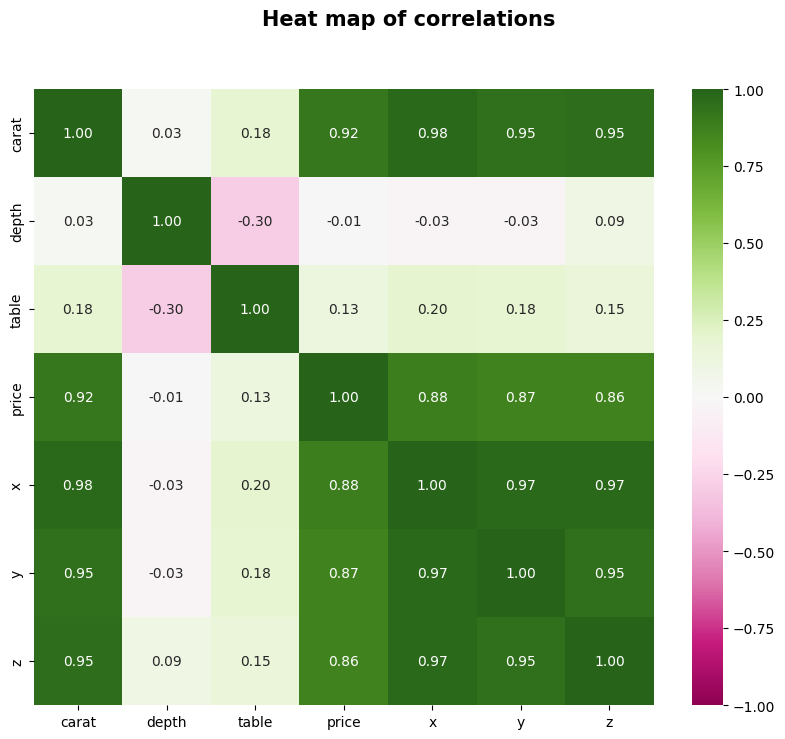

In [5]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sub_df=data.select_dtypes(include=['float64', 'int64'])#выбираем только численные признаки, целевая переменная тоже там
plt.suptitle(r"Heat map of correlations", fontsize=15, fontweight='bold')
ax = sns.heatmap(sub_df.corr(), vmin=-1, vmax=1, center= 0, cmap='PiYG', annot=True, fmt="0.2f") #строим тепловую карту корреляций
plt.show()

У целевой переменной `price` и признаков `carat, x, y, z` есть сильная положительная линейная связь (коэффициент корреляции `> 0.85`), у остальный признаков - слабая связь с `price`



**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [5]:
col_list = list(data)
col_list.remove('price')

X = data[col_list] #признаки
y = data['price'] #таргет

In [6]:
#преобразуем нечисловые признаки при помощи one-hot encoding
X_dum = pd.get_dummies(X, drop_first=True)

In [7]:
X_dum.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [44]:
#список новых колонок
new_col_list = list(X_dum)
new_col_list = new_col_list[6:]
new_col_list

['cut_Good',
 'cut_Ideal',
 'cut_Premium',
 'cut_Very Good',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'color_J',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2']

**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [45]:
from sklearn.model_selection import train_test_split
#как показывает у, данные у нас идут строго по классам, поэтому будем их перемешивать
#stratify разбивает на трейн и тест так, чтобы отношение данных разных классов в подвыборках было одинаковым,
#сейчас у нас лин регрессия, а не классификация, поэтому не будем устанавливать stratify
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.3, shuffle=True, random_state=66)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [48]:
#отделяем вещественные
float_col_list = list(X_dum)[:6]
X_train_float = X_train[float_col_list]
X_test_float = X_test[float_col_list]

In [50]:
from sklearn.preprocessing import StandardScaler
#масштабируем вещественные признаки по стандартному нормальному распределению
scaler = StandardScaler()
scaler.fit(X_train_float)
X_train_float_tr = scaler.transform(X_train_float)
X_test_float_tr = scaler.transform(X_test_float)

#объединяем маштабированные вещественные признаки с остальными
X_train_transformed = np.concatenate((X_train_float_tr, X_train[new_col_list]), axis = 1)
X_test_transformed = np.concatenate((X_test_float_tr, X_test[new_col_list]), axis = 1)

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [55]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_transformed, y_train)

In [56]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
reg.score(X_train_transformed, y_train) #наилучший возможный результат R^2 score - 1.0, у нас 0.92 - это значит модель работает лучше константного предсказания с точки зрения MSE

0.9201675332546213

In [57]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
from sklearn.metrics import mean_squared_error

In [58]:
#MSE на тестовых данных
y_pred_test = reg.predict(X_test_transformed)
mean_squared_error(y_test, y_pred_test)

1317094.1670389662

In [59]:
#MSE на тренировочных данных
y_pred_train = reg.predict(X_train_transformed)
mean_squared_error(y_train, y_pred_train)

1261425.9003372854

Меньшее значение MSE означает, что модель допускает меньше больших ошибок в смысле дельты между предсказанным и реальным значением. MSE на тренировочных данных меньше, чем на тестовых, что логично.

**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [60]:
sorted(list(zip(reg.coef_, list(X_dum))), key = lambda x: x[0])

[(-2343.329143806857, 'color_J'),
 (-1462.4838764392894, 'color_I'),
 (-1023.5249547200241, 'x'),
 (-961.9948196335076, 'color_H'),
 (-460.2757719144017, 'color_G'),
 (-264.6911451351095, 'color_F'),
 (-196.54180974734604, 'color_E'),
 (-181.95127332796898, 'z'),
 (-80.63941547764705, 'depth'),
 (-64.87243775255406, 'table'),
 (15.744448530246284, 'y'),
 (556.559818214435, 'cut_Good'),
 (688.1735888651394, 'cut_Very Good'),
 (740.0926398411007, 'cut_Premium'),
 (801.3132601274517, 'cut_Ideal'),
 (2826.7090835123186, 'clarity_SI2'),
 (3780.144813178543, 'clarity_SI1'),
 (4382.515428480232, 'clarity_VS2'),
 (4675.007884914057, 'clarity_VS1'),
 (5049.335212490421, 'clarity_VVS2'),
 (5131.314466538686, 'clarity_VVS1'),
 (5362.206153639554, 'carat'),
 (5385.599763747863, 'clarity_IF')]

Наибольший коэффициент по модулю из вещественных признаков имеет признак `carat`, т.е. он на порядок больше всех влияет на цену. Наименьший по абсолютному значению из вещественных признаков (в 5 раз по модулю меньше `carat`)  имеет `x`, чем он больше, тем меньше цена.

Если говорить не про вещественные признаки, то на цену также сильно влияет `clarity` - чистота бриллианта, причем чем чистота IF - наилучшая (из описания датасета) и на цену влияет больше всех.

**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
from sklearn import linear_model
#обучаем Lasso
lasso = linear_model.Lasso(alpha=10)
lasso.fit(X_train_transformed, y_train)

#обучаем Ridge
ridge = linear_model.Ridge(alpha=10)
ridge.fit(X_train_transformed, y_train)

In [62]:
sorted(list(zip(lasso.coef_, list(X_dum))), key = lambda x: x[0]) #для Lasso

[(-1767.170939131802, 'color_J'),
 (-1007.9069781728773, 'color_I'),
 (-802.871099360422, 'clarity_SI2'),
 (-601.4971255412083, 'x'),
 (-587.2593439215873, 'color_H'),
 (-145.25977918454876, 'depth'),
 (-136.05613312949984, 'z'),
 (-109.18307967781085, 'table'),
 (-101.26454304820552, 'color_G'),
 (-0.0, 'y'),
 (-0.0, 'cut_Good'),
 (-0.0, 'color_F'),
 (0.0, 'clarity_SI1'),
 (2.9801529147327237, 'color_E'),
 (66.89452816148561, 'cut_Very Good'),
 (73.53734115034531, 'cut_Premium'),
 (158.2184269263878, 'cut_Ideal'),
 (571.0131774089496, 'clarity_VS2'),
 (796.9152426735118, 'clarity_VS1'),
 (1140.942637815092, 'clarity_VVS2'),
 (1162.4312093637468, 'clarity_VVS1'),
 (1223.3199618318695, 'clarity_IF'),
 (4781.244677999025, 'carat')]

In [63]:
sorted(list(zip(ridge.coef_, list(X_dum))), key = lambda x: x[0]) #Ridge

[(-2307.532805386174, 'color_J'),
 (-1437.6871846534052, 'color_I'),
 (-976.014243711329, 'x'),
 (-943.626204737269, 'color_H'),
 (-442.21849102091124, 'color_G'),
 (-251.36181463590017, 'color_F'),
 (-189.90128295912484, 'z'),
 (-184.4672226001372, 'color_E'),
 (-82.82133400095779, 'depth'),
 (-67.28500537909852, 'table'),
 (18.13411459046433, 'y'),
 (582.7631316051682, 'cut_Good'),
 (721.139436111235, 'cut_Very Good'),
 (767.5468289449375, 'cut_Premium'),
 (832.4422730866102, 'cut_Ideal'),
 (2245.5438132204617, 'clarity_SI2'),
 (3190.7445260517484, 'clarity_SI1'),
 (3789.303517333881, 'clarity_VS2'),
 (4076.17931111577, 'clarity_VS1'),
 (4443.853779198602, 'clarity_VVS2'),
 (4518.745039078925, 'clarity_VVS1'),
 (4750.616634712227, 'clarity_IF'),
 (5307.085695131473, 'carat')]

У Lasso по сравнению с линейной регресиией признак `carat` уменьшился примерно на 10%, а `x` на 40%.

У Ridge изменения не такие сильные, например: у признака `carat` минус 1.5%, а у `x` минус 4.5% по сравнению с линейной регрессией.

В нашем случае `x, y, z, carat` между собой попарно имеют сильную линейную связь (см. тепловую карту корреляций), поэтому действительно очень высок риск проблемы мультиколлинеарности. Мы видим, что Lasso обнулил `y`, уменьшив проблему мультиколлинеарности.



**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [64]:
alpha = [0.1, 1, 10, 100, 200]
arr_c_lasso = [] #веса коэффициентов lasso
arr_c_ridge = [] #веса коэффициентов ridge
for a in alpha:
  #обучаем Lasso
  lasso = linear_model.Lasso(alpha=a)
  lasso.fit(X_train_transformed, y_train)
  arr_c_lasso.append(np.linalg.norm(lasso.coef_))

  #обучаем Ridge
  ridge = linear_model.Ridge(alpha=a)
  ridge.fit(X_train_transformed, y_train)
  arr_c_ridge.append(np.linalg.norm(ridge.coef_))

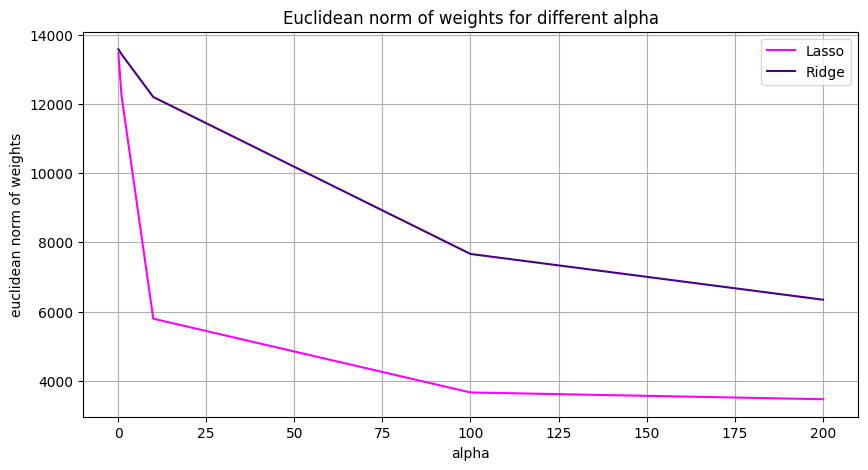

In [65]:
plt.figure(figsize=(10, 5))
plt.title("Euclidean norm of weights for different alpha")
x = np.array(alpha)
y1 = np.array(arr_c_lasso)
y2 = np.array(arr_c_ridge)
plt.plot(x, y1, label='Lasso', color='magenta')
plt.plot(x, y2, label='Ridge', color ='indigo')
plt.xlabel("alpha")
plt.ylabel("euclidean norm of weights")
plt.grid(True)
plt.legend()
plt.show()

Как видно на графике, Lasso снижает вес значительно быстрее, чем Ridge, т.к. Lasso имеет склонность занулять большие коэффициенты. Именно поэтому Lasso используют для отбора признаков.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [66]:
from sklearn.linear_model import LassoCV

In [ ]:
#проводим кросс-валидацию с кол-вом участков = 5, используя ранее заданные альфа
reg = LassoCV(cv=5, alphas=alpha, random_state=66).fit(X_train_transformed, y_train)

In [68]:
print('alpha', *reg.alphas_, sep='\t\t') #альфы
print('MSE', *reg.mse_path_.mean(axis=1), sep=' ') #усредненные ошибки MSE

alpha		200.0		100.0		10.0		1.0		0.1
MSE 2404091.6336943666 2204540.863256165 1496463.2798239896 1285636.7892572773 1354792.8137894354


Наилучшее качество дает `alpha = 1`, т.к. значение ошибки MSE наименьшее при этом параметре

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [69]:
great_lasso = linear_model.Lasso(alpha=1)
great_lasso.fit(X_train_transformed, y_train)

Lasso(alpha=1)

In [70]:
sorted(list(zip(great_lasso.coef_, list(X_dum))), key = lambda x: x[0]) #коэффициенты признаков

[(-2262.680600990675, 'color_J'),
 (-1394.0786881074775, 'color_I'),
 (-990.3129108384979, 'x'),
 (-901.841225221534, 'color_H'),
 (-401.87425219801804, 'color_G'),
 (-210.6207253936598, 'color_F'),
 (-155.67160157722017, 'z'),
 (-142.76507307132744, 'color_E'),
 (-93.01369571021205, 'depth'),
 (-70.95177824242019, 'table'),
 (0.0, 'y'),
 (457.43817292629745, 'cut_Good'),
 (596.2566402661517, 'cut_Very Good'),
 (642.4910730136778, 'cut_Premium'),
 (705.2687406512805, 'cut_Ideal'),
 (2278.6313691695427, 'clarity_SI2'),
 (3227.683958527968, 'clarity_SI1'),
 (3826.3639324573423, 'clarity_VS2'),
 (4111.260308087088, 'clarity_VS1'),
 (4481.802603358709, 'clarity_VVS2'),
 (4556.807191485395, 'clarity_VVS1'),
 (4791.252473787489, 'clarity_IF'),
 (5303.562391520169, 'carat')]

Самым важным из вещественных признаков остался `carat`, он сильнее всего влияет на таргет - цену бриллианта, также значим оказался. Также информативными оказались признаки `clarity, color, cut`. Абсолютно неинформативным оказался признак `y` (коэффициент = 0), не очень информативными в сравнении с остальными оказались признаки `table, depth, z`.

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [74]:
y_pred_test = great_lasso.predict(X_test_transformed)
mean_squared_error(y_test, y_pred_test) # MSE Lasso на тестовой выборке

1317892.822557922

У линейной регрессии `MSE = 1317094`, у Lasso-регрессии `MSE = 1317893`, разница в значения составляет около `0.06%`. Но все же линейная регрессия оказалась немного лучше по этой метрике.

Только по одной метрике сложно сделать вывод, какую модель лучше использовать, особенно когда разница в ней настолько маленькая.

Выигрыш в MSE у линейной регрессии связан с тем, что в линейной регрессии при подборе параметров минимизируется сумма квадратов разности предсказанного и реального значений (другими словами минимизируется MSE), когда в Lasso минимизируется другая функция - с добавленным членом `alpha*l_1`

Источники: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
https://scikit-learn.org/stable/modules/linear_model.html#lasso